In [1]:
%matplotlib inline
import matplotlib.pylab
import seaborn as sns
import pandas as pd
import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [12]:
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

In [2]:
col=['USA', u'Global',  u'Global Ex USA', u'Europe', u'North America', u'Pacific']

data=pd.read_excel('BettingAgainstBeta.xlsx', header=18,index_col=0,parse_dates=[0])[col].dropna(how='all')

In [3]:
factors=['BAB Factors','MKT','SMB','HML FF','HML Devil','UMD']
col=['USA', u'Global',  u'Global Ex USA', u'Europe', u'North America', u'Pacific']
data={}
for f in factors:
    data[f]=pd.read_excel('BettingAgainstBeta.xlsx', sheet_name=f,header=18,index_col=0,parse_dates=[0])[col].dropna(how='all')

In [4]:
data['QMJ']=pd.read_excel('QualityMinusJunk.xlsx', sheet_name=f,header=18,index_col=0,parse_dates=[0])[col].dropna(how='all')

In [5]:
data.keys()

['HML FF', 'BAB Factors', 'HML Devil', 'UMD', 'MKT', 'QMJ', 'SMB']

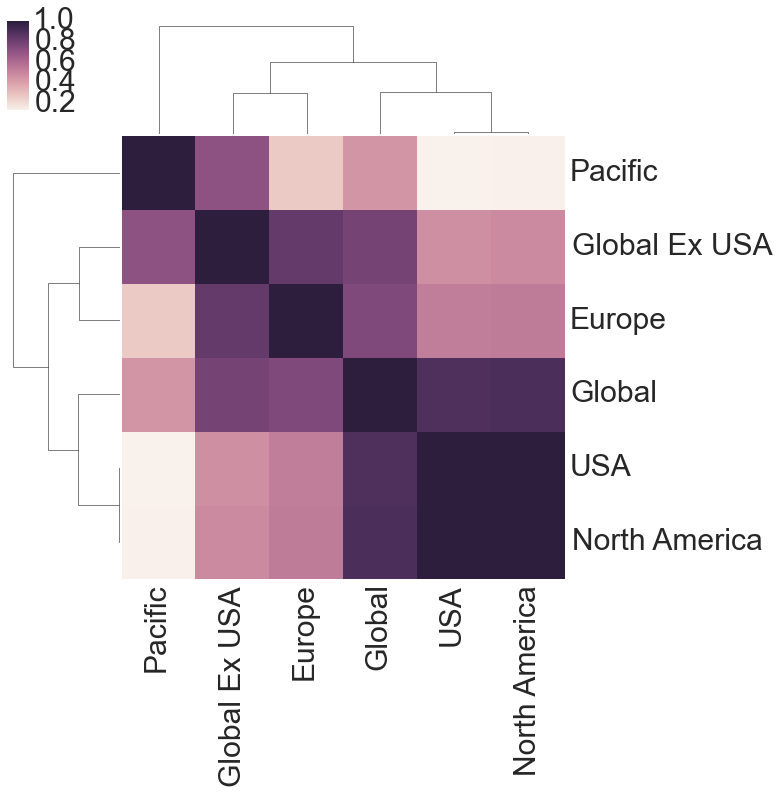

In [13]:
sns.clustermap(data['QMJ'].corr())

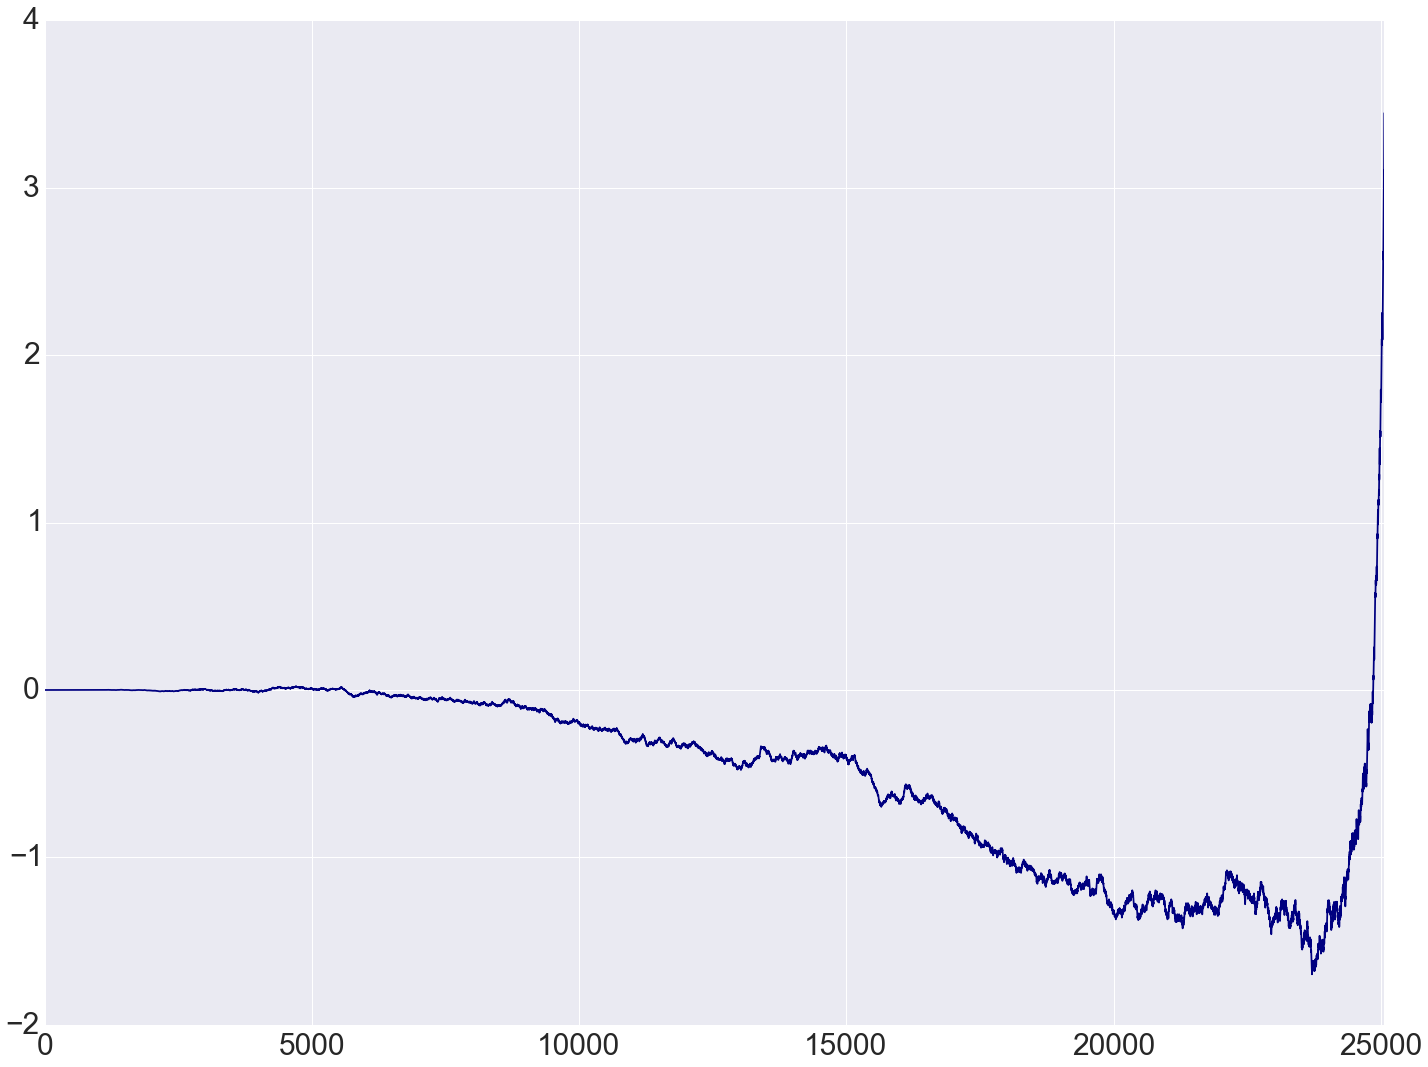

In [14]:
x=data['HML Devil'].USA
df=pd.DataFrame()
df['Original']=x
df['abs']=x.abs()
pd.Series(df.sort_values('abs').Original.values).cumsum().plot(colormap='jet')

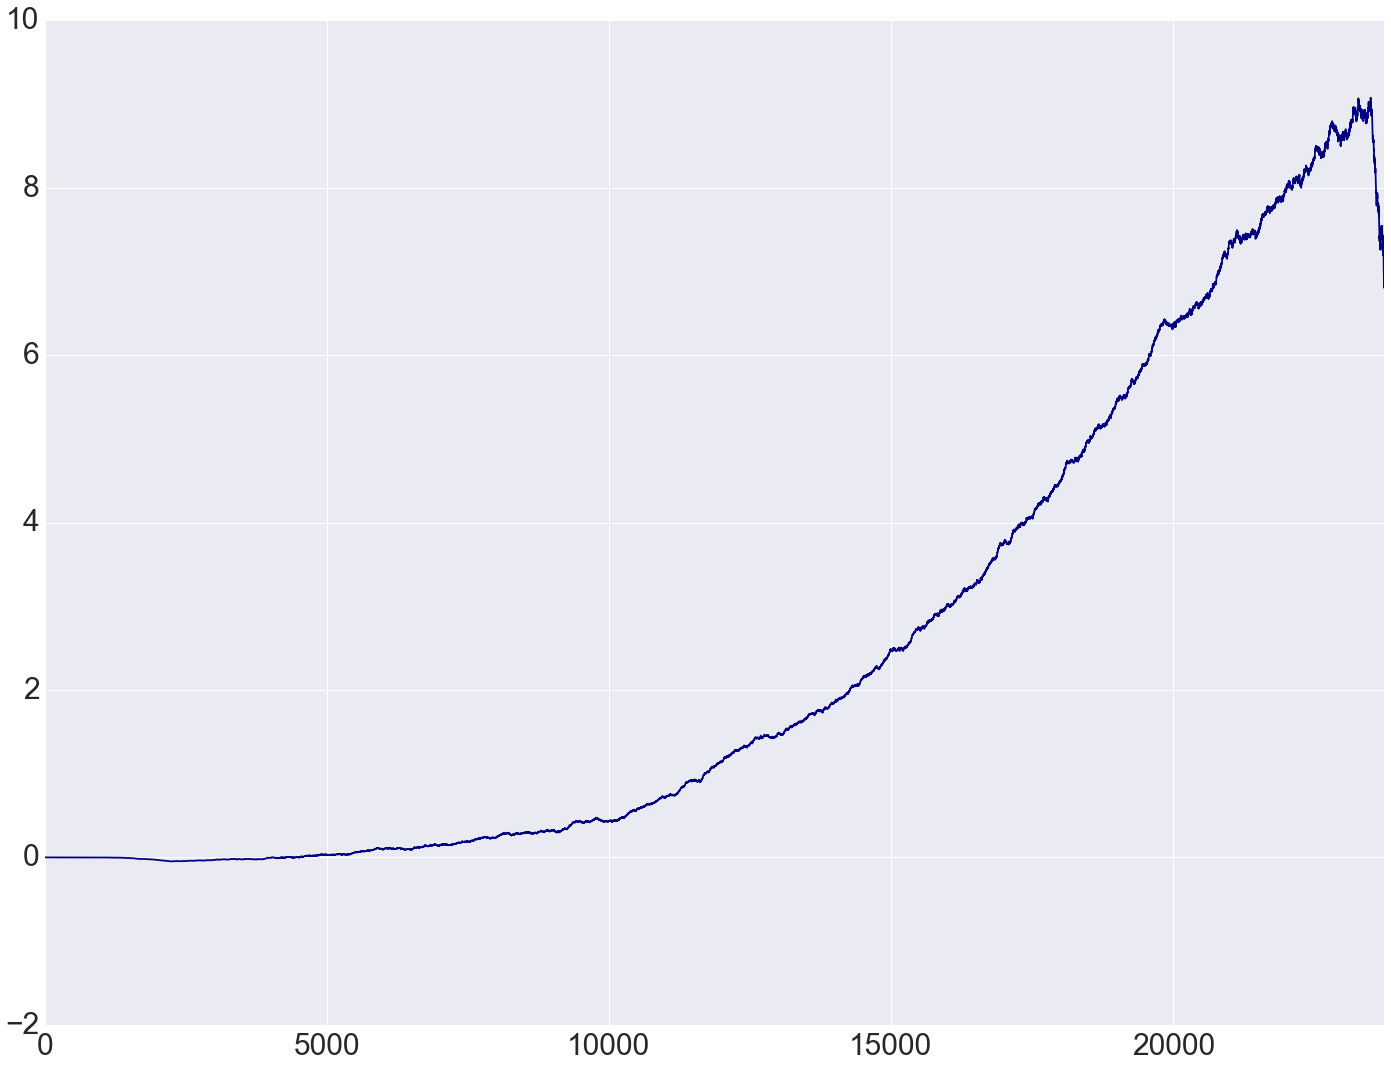

In [15]:
x=data['BAB Factors'].USA
df=pd.DataFrame()
df['Original']=x
df['abs']=x.abs()
pd.Series(df.sort_values('abs').Original.values).cumsum().plot(colormap='jet')

In [9]:
all_data=pd.DataFrame()
for f in data.keys():
    x=data[f].USA['1980':]
    df=pd.DataFrame()
    df['Original']=x
    df['abs']=x.abs()
    all_data[f]= pd.Series(df.sort_values('abs').Original.values).cumsum()

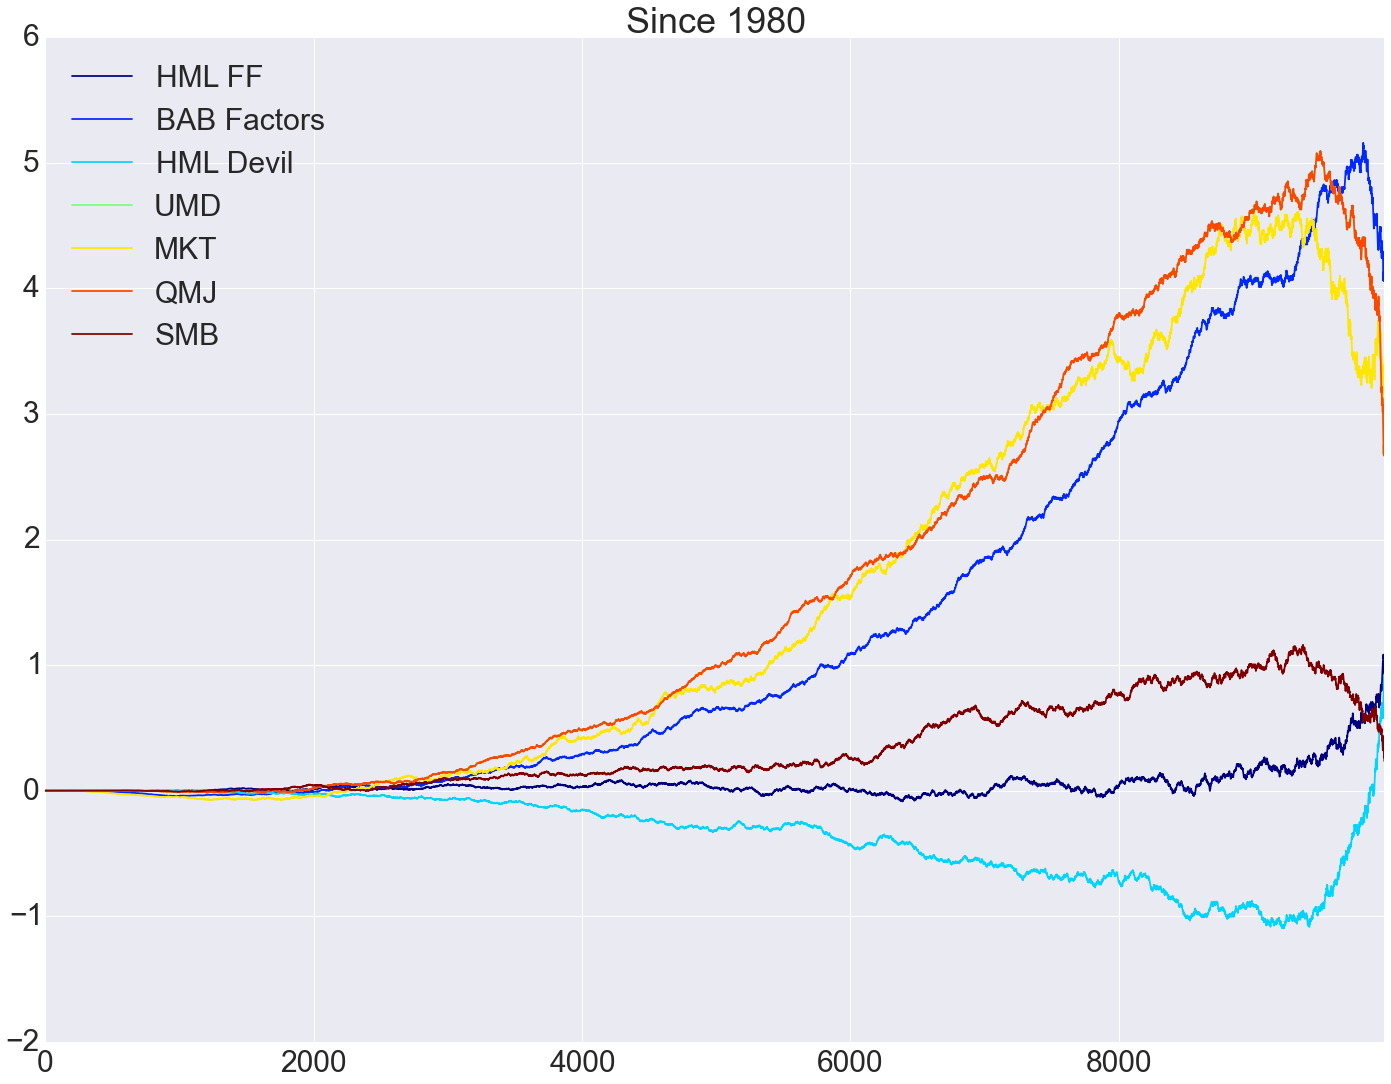

In [16]:
all_data.plot(colormap='jet',title='Since 1980')

In [11]:
aqr=pd.read_csv('../FinancePhD/LiquidityMomentum/AQR.csv',parse_dates=['DATE'],index_col=0)

In [17]:
indices={'CTA':'CTA_Historical.xls',
         'CTA Mutual Funds':'CTAM_Historical.xls',
         'Trend Index':'Trend_Index_Historical.xls',
         'Short Term Traders Index':'STTI_Historical.xls',
         'Multi Alternative Risk Premia':'MARP_Historical.xls'
        }
data_index=pd.DataFrame()
for i in indices.keys():
    file='https://cib.societegenerale.com/fileadmin/indices_feeds/'+indices[i]
    data_index[i]=pd.read_csv(file,sep='\t',index_col=0,parse_dates=[0],usecols=[0,1]).ix[:,0]

data_pct=data_index.pct_change()


/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


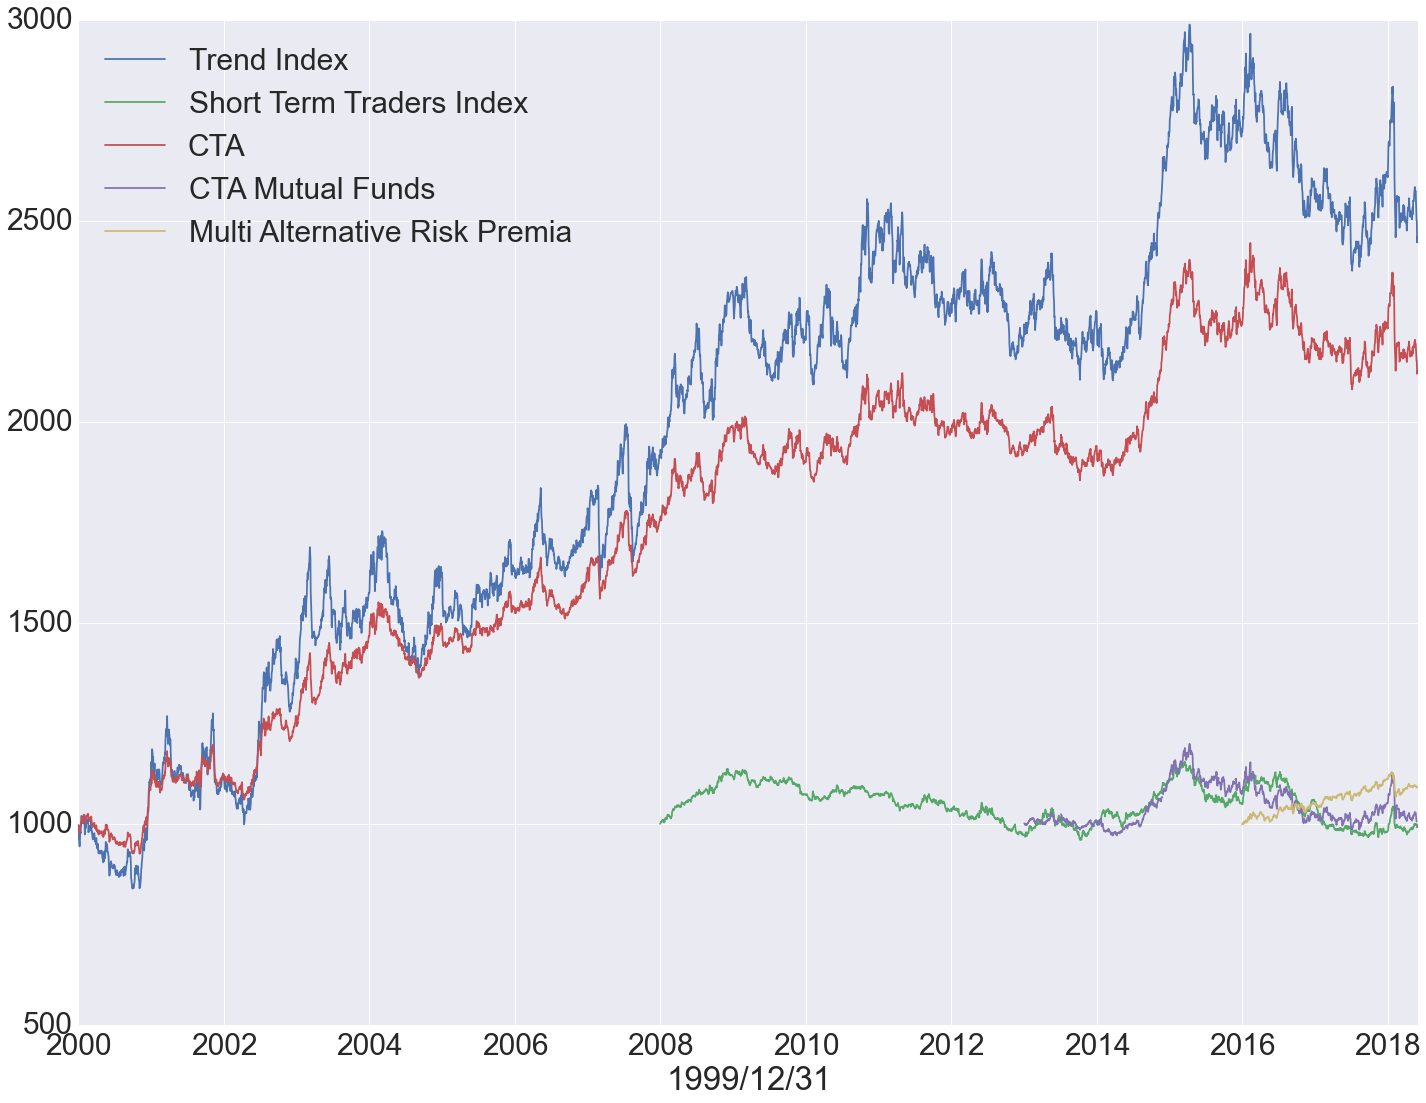

In [18]:
data_index.plot()

In [23]:
trend=pd.DataFrame()
for f in ['CTA','Trend Index']:
    x=data_pct[f]
    df=pd.DataFrame()
    df['Original']=x
    df['abs']=x.abs()
    trend[f]= pd.Series(df.sort_values('abs').Original.values).cumsum()

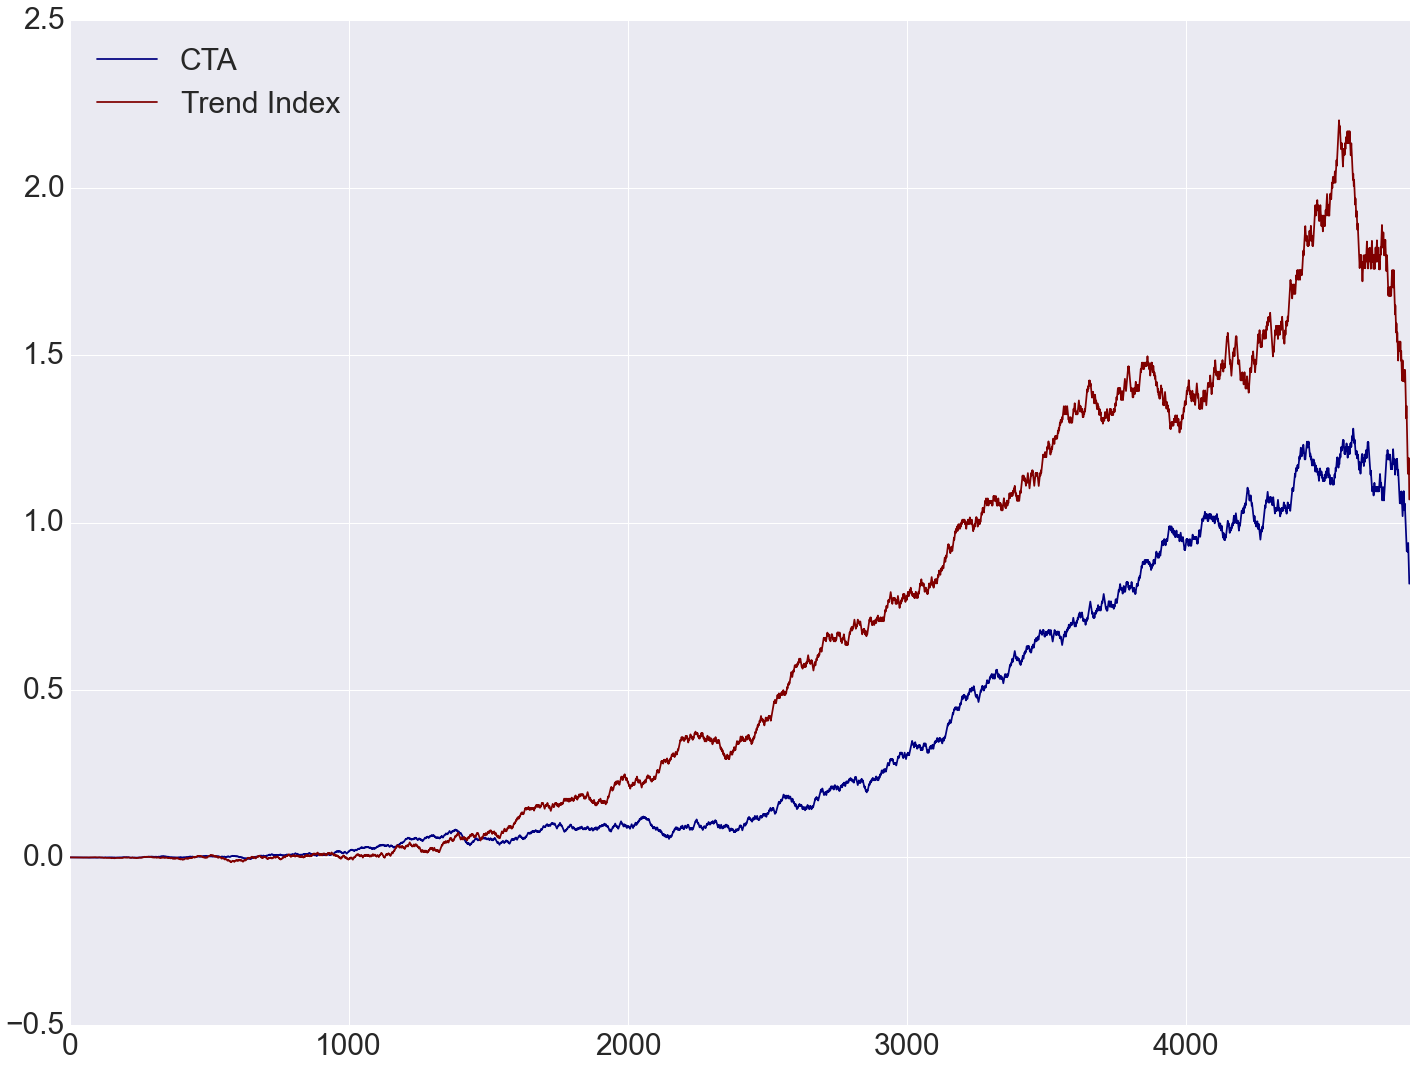

In [25]:
trend.plot(colormap='jet')